In [249]:
# -*- coding: utf-8 -*-
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
import os

In [250]:
PATH = 'dataset/metabolite'
data = pd.read_excel('Alanine-sample.xlsx')
data.head()

,m/z,Absolute Intensity,Relative Intensity
0,45,33865,6.19
1,46,212,0.04
2,47,38221,6.98
3,48,259,0.05
4,49,1405,0.26


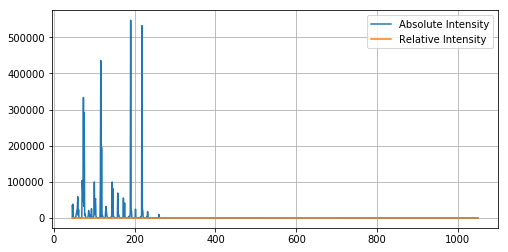

In [251]:
x = data["m/z"]
y = data["Absolute Intensity"]
z = data["Relative Intensity"]

plt.figure(figsize=(8,4))
plt.plot(x, y, label='Absolute Intensity')
plt.plot(x, z, label='Relative Intensity')
plt.grid()
plt.legend()
plt.show()

In [252]:
x = data["m/z"]
y = data["Absolute Intensity"]
z = data["Relative Intensity"]

x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

nx = x/max(x) # max nomal
ny = y/max(y)
nz = z/max(z)

lx = np.log(x) # log nomal
ly = np.log(y)
lz = np.log(z)

nlx = lx/max(lx) # max log nomal
nly = ly/max(ly)
nlz = lz/max(lz)

ex = np.exp(x) # exp nomal
ey = np.exp(y)
ez = np.exp(z)

etx = nx*(np.log2(1/nx)) # entropy nomal
ety = ny*(np.log2(1/ny))
etz = nz*(np.log2(1/nz))

print(etx)

print('x:{}, max_x:{}, nx:{}'.format(x[0], max(x), nx[0]))
print('y:{}, max_y:{}, ny:{}'.format(y[0], max(y),ny[0]))
print('z:{}, max_z:{}, nz:{}'.format(z[0], max(z),nz[0]))

[0.19475659 0.19769537 0.20060427 0.20348394 0.20633498 0.20915797
 0.21195349 0.21472206 0.21746421 0.22018043 0.2228712  0.225537
 0.22817825 0.2307954  0.23338886 0.23595903 0.2385063  0.24103104
 0.24353362 0.24847369 0.25091185 0.25572603 0.25810266 0.26045937
 0.26511419 0.26741284 0.26969267 0.27195392 0.27419686 0.27642172
 0.28081813 0.28299013 0.28514496 0.28940394 0.2915085  0.29359669
 0.29566873 0.29772478 0.29976504 0.30178969 0.3037989  0.30777169
 0.3097356  0.31168473 0.31361925 0.3155393  0.31744504 0.31933662
 0.32121417 0.32307785 0.32492779 0.32676412 0.32858698 0.3303965
 0.33219281 0.33397603 0.33924841 0.3427001  0.34440733 0.34610228
 0.34778508 0.34945582 0.35111461 0.35276156 0.35439677 0.35602033
 0.35763234 0.35923291 0.36396684 0.36706724 0.36860104 0.37012402
 0.37163627 0.37313786 0.37462889 0.37610942 0.37757955 0.37903935
 0.38477675 0.38758541 0.38897499 0.39035482 0.39172498 0.39308552
 0.39443653 0.39577806 0.39711018 0.39843295 0.40234581 0.4074358

/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


In [355]:
arraynlx = nlx.reshape((1,671))
arraynly = nly.reshape((1,671))
arraynlz = nlz.reshape((1,671))

arrayx = etx.reshape((1,671))
arrayy = ety.reshape((1,671))
arrayz = etz.reshape((1,671))

xmean = np.mean(arrayx)
xvar = np.var(arrayx)
xstd = np.std(arrayx)

ymean = np.mean(arrayy)
yvar = np.var(arrayy)
ystd = np.std(arrayy)

zmean = np.mean(arrayz)
zvar = np.var(arrayz)
zstd = np.std(arrayz)

xymean = np.mean(arrayx+arrayy)

firstcov = data.cov()
seccov = np.cov(arrayx, arrayy)
aseccov = np.asarray(seccov)
etcov = seccov*(np.log2(1/seccov))

cov1 = np.cov(x, y)[0][1]
cov1abs = abs(cov1)

print(xmean, ymean, zmean)
print(xvar, yvar, zvar)
print(xstd, ystd, zstd)
print(xymean)
print(cov1)
print(cov1abs)
print(qw)
print(seccov)

0.3606717191488577 0.020396289760033704 nan
0.023276356180691835 0.004689882035859871 nan
0.15256590766187522 0.06848271340900469 nan
0.3810680089088914
-2340644.5597482068
2340644.5597482068
                             m/z  Absolute Intensity  Relative Intensity
m/z                 9.335689e+04       -2.340645e+06         -427.500432
Absolute Intensity -2.340645e+06        1.588905e+09       290305.889735
Relative Intensity -4.275004e+02        2.903059e+05           53.041250
[[ 0.0233111  -0.00034617]
 [-0.00034617  0.00469688]]


/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log2


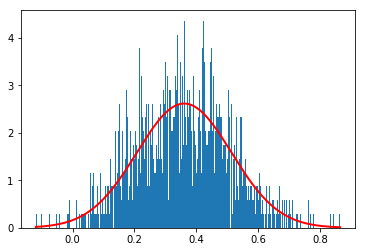

In [347]:
import numpy as np
import matplotlib.pyplot as plt

mu1, sigma1 = xmean, xstd # mean and standard deviation
# np.random.nomral 함수를 이용해서 평균 0, 표준편차 0.1인 sample들을 1000개 추출한다.
s1 = np.random.normal(mu1, sigma1, 1050)

# sample들의 historgram을 출력한다.
count, bins, ignored = plt.hist(s1, 300, normed=True)
# sample들을 이용해서 Gaussian Distribution의 shape을 재구축해서 line으로 그린다.
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) * 
		np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ), linewidth=2, color='r')
plt.show()

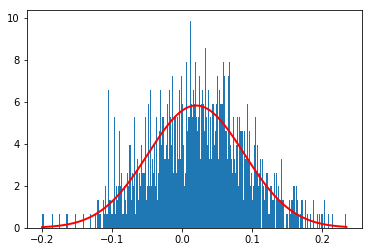

In [348]:
mu2, sigma2 = ymean, ystd # mean and standard deviation
# np.random.nomral 함수를 이용해서 평균 0, 표준편차 0.1인 sample들을 1000개 추출한다.
s2 = np.random.normal(mu2, sigma2, 1050)

# sample들의 historgram을 출력한다.
count, bins, ignored = plt.hist(s2, 300, normed=True)
# sample들을 이용해서 Gaussian Distribution의 shape을 재구축해서 line으로 그린다.
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) * 
		np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), linewidth=2, color='r')
plt.show()

[[ 0.0233111  -0.00034617]
 [-0.00034617  0.00469688]]


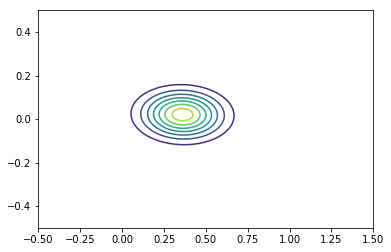

In [351]:
from scipy.stats import multivariate_normal
XX, YY = np.mgrid[-0.5:1.5:500j, -0.5:0.5:200j]
rv = multivariate_normal([xmean, ymean], [[0.0233111, -0.00034617],
                                          [-0.00034617, 0.00469688]])
plt.grid(False)
plt.contour(XX, YY, rv.pdf(np.dstack((XX, YY))))
print(seccov)

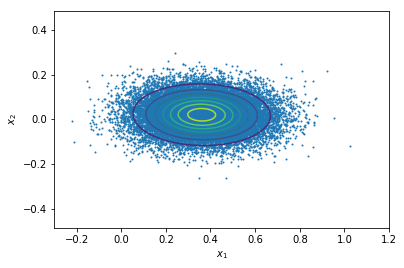

In [366]:
mu = [xmean, ymean]
cov = [[0.0233111, -0.00034617], [-0.00034617, 0.00469688]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(20000)

xx = np.linspace(-0.3, 1.2, 5000)
yy = np.linspace(-0.4, 0.4, 5000)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(-0.3, 1.2)
plt.ylim(-0.4, 0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

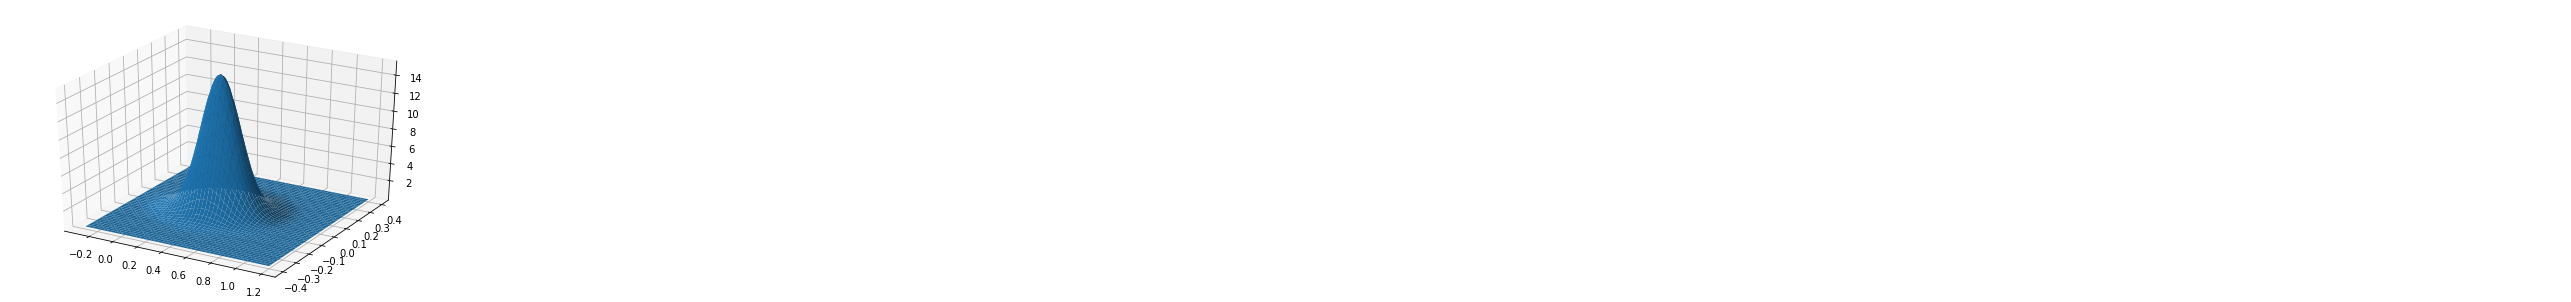

In [367]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, rv.pdf(np.dstack((XX, YY))))

In [61]:
np.savez('Alanine-sample-limit-log.npz', arrayx=arrayx, arrayy=arrayy, arrayz=arrayz)
data = np.load('Alanine-sample-limit-log.npz')
ex = data['arrayx']
ey = data['arrayy']
ez = data['arrayz']
print(data)
print(ex)
print(ey)
print(ez)

[[0.19475659 0.19769537 0.20060427 0.20348394 0.20633498 0.20915797
  0.21195349 0.21472206 0.21746421 0.22018043 0.2228712  0.225537
  0.22817825 0.2307954  0.23338886 0.23595903 0.2385063  0.24103104
  0.24353362 0.24847369 0.25091185 0.25572603 0.25810266 0.26045937
  0.26511419 0.26741284 0.26969267 0.27195392 0.27419686 0.27642172
  0.28081813 0.28299013 0.28514496 0.28940394 0.2915085  0.29359669
  0.29566873 0.29772478 0.29976504 0.30178969 0.3037989  0.30777169
  0.3097356  0.31168473 0.31361925 0.3155393  0.31744504 0.31933662
  0.32121417 0.32307785 0.32492779 0.32676412 0.32858698 0.3303965
  0.33219281 0.33397603 0.33924841 0.3427001  0.34440733 0.34610228
  0.34778508 0.34945582 0.35111461 0.35276156 0.35439677 0.35602033
  0.35763234 0.35923291 0.36396684 0.36706724 0.36860104 0.37012402
  0.37163627 0.37313786 0.37462889 0.37610942 0.37757955 0.37903935
  0.38477675 0.38758541 0.38897499 0.39035482 0.39172498 0.39308552
  0.39443653 0.39577806 0.39711018 0.39843295 0.402

In [249]:
colors = cm.hsv(nz)
colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(z)

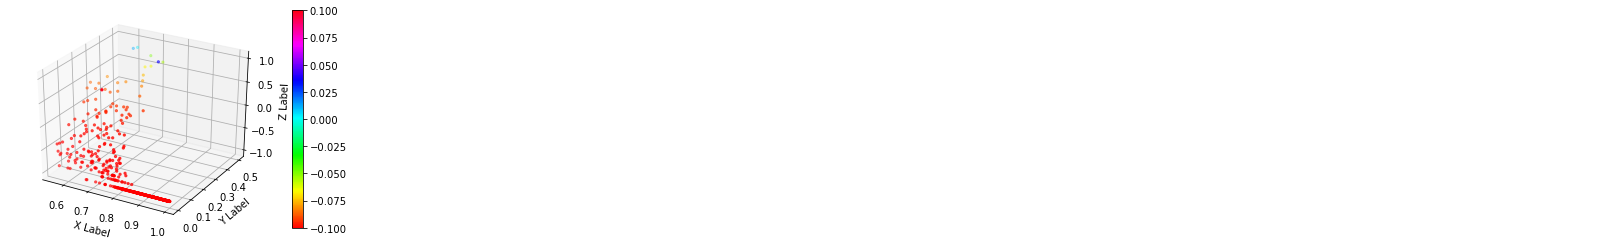

In [250]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nlx, ety, nlz, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

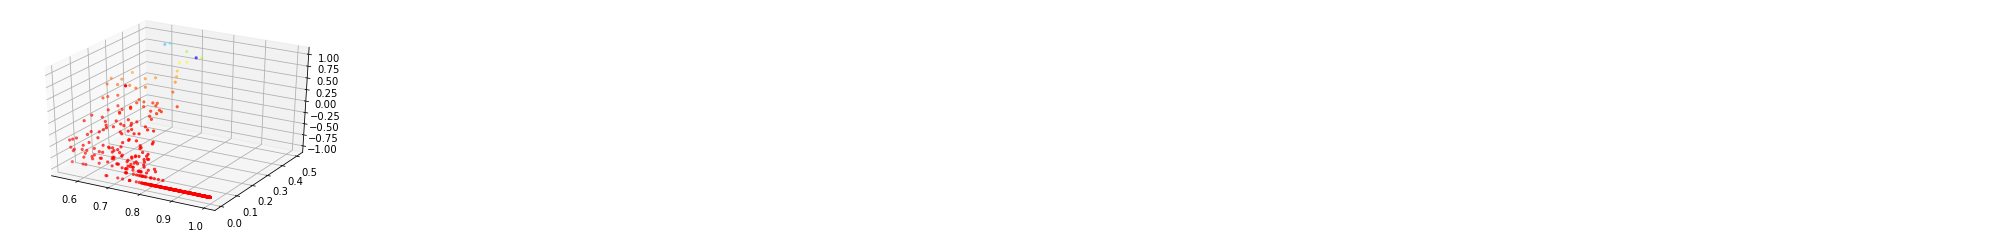

In [251]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nlx, ety, nlz, c=colors, marker='.')

plt.grid()
plt.show()

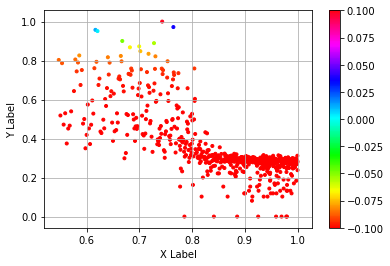

<Figure size 432x288 with 0 Axes>

In [252]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()
plt.savefig("logx-ety-figure1.png")

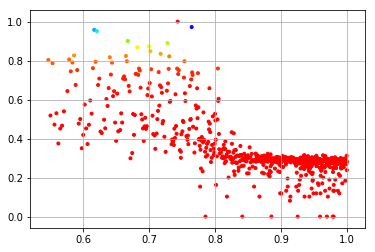

In [253]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=colors, marker='.')


plt.grid()
plt.show()
fig.savefig("alanine1.png")

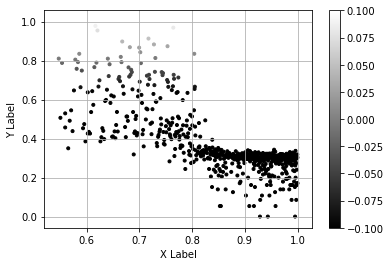

<Figure size 432x288 with 0 Axes>

In [240]:
g_colors = cm.gray(nlz)
g_colmap = cm.ScalarMappable(cmap=cm.gray)
g_colmap.set_array(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=g_colors, marker='.')
cb = fig.colorbar(g_colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()
plt.savefig("figure1-1.png")